# Tasksheet 4

Carson Fox (A02251670)

## Task 1

## Task 2

The following is an implementation of the second-order second derivative approximation discussed above:

In [12]:
function d2x(f, h=1e-6)
    x0 -> (f(x0 + h) - 2f(x0) + f(x0 - h)) / h^2
end

d2x (generic function with 2 methods)

This approximation can be used to evaluate the second derivative for functions with complicted derivatives.

In [20]:
f(x) = ((x - pi/2) * tan(x)^2) / (x^2 + 65)
d2x(f)(pi/4)

-0.06768370586218708

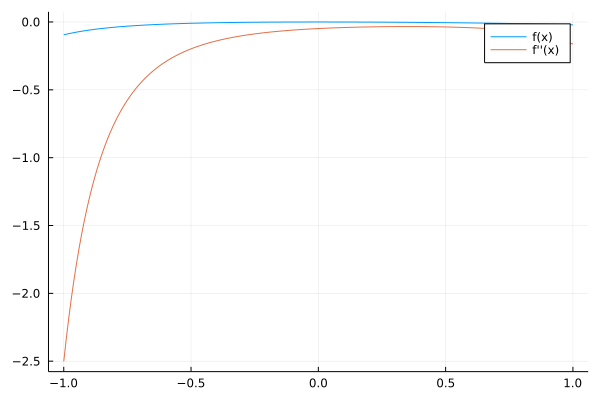

In [32]:
plot(-1:.01:1, [f, d2x(f)], labels=["f(x)" "f''(x)"])

## Task 3

## Task 4

## Task 5

Explicit euler: p(t0 + h) = p(t0) + h(a * P(t0) - b * P(t0)^2)

A logistic equation models some population or concentration, limited by a carrying capacity. It is parameterized by a reproduction/growth constant, $\alpha$, and a predation/decay constant, $\beta$. The growth rate is modeled by: $\frac{dP}{dt} = \alpha P - \beta P^2$.